# Detection pour le quadripede

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import math

In [2]:
data = np.loadtxt("Marche_Train.txt")

Le code suivant sert à réaliser la création de la base de données pour les pas d'un quadripède à partir des pas enregistrés pour un bipède (Homme), pour cela nous aons détecté dans un pas quelle jambe avançai et quelle jambe reculai grace à la différence entre les 2 signaux. Nous avons ensuite séparé les 2 signaux du pas afin de les stocker dans des tableaux prévu à cet effet. On répète la même opération avec un autre pas de nos données puis à partir de ces quatres signaux nous pouvons créer les 6 positions que peuvent prendre les pattes d'un quadripède. Une fois l'opération répètée pour chaque couple de pas de nos données d'entrée nous avons une base de données contenant des pas d'un quadripède.

Positions créées par notre code:

Position 1 : ![Position 1](img/PasCas0.png) 


Position 2 : ![Position 2](img/PasCas1.png) 


Position 3 : ![Position 3](img/PasCas2.png)


Position 4 : ![Position 4](img/PasCas3.png) 


Position 5 : ![Position 5](img/PasCas4.png) 


Position 6 : ![Position 6](img/PasCas5.png)

In [3]:
def create_dataset(data,liste):
    data2 = np.zeros((int(data.shape[0]/40),40,3), dtype = 'i')
    up1 = np.zeros((40), dtype = 'i')
    up2 = np.zeros((40), dtype = 'i')
    down1 = np.zeros((40), dtype = 'i')
    down2 = np.zeros((40), dtype = 'i')
    liste2 = []
    for i in range(int(data.shape[0]/40)):
        for j in range(40):
            data2[i,j,0] = data[i*40+j,0]
            data2[i,j,1] = data[i*40+j,1]
            data2[i,j,2] = data[i*40+j,2]
    
    for i in range(data2.shape[0]):
        if data2[i,1,2]-data2[i,0,2]<0:
            up1 = data2[i,:,1]
            down1 = data2[i,:,0]
        else:
            up1 = data2[i,:,0]
            down1 = data2[i,:,1]
        
        for j in range(i,data2.shape[0]):
            if data2[j,1,2]-data2[j,0,2]<0:
                up2 = data2[j,:,1]
                down2 = data2[j,:,0]
            else:
                up2 = data2[j,:,0]
                down2 = data2[j,:,1]
            
            buff = np.append(up1,down1,axis=0)
            buff = np.append(buff,up2,axis=0)
            buff = np.append(buff,down2,axis=0)
            buff = np.append(buff,np.array([0],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
            buff = np.append(down1,up1,axis=0)
            buff = np.append(buff,down2,axis=0)
            buff = np.append(buff,up2,axis=0)
            buff = np.append(buff,np.array([1],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
            buff = np.append(up1,down1,axis=0)
            buff = np.append(buff,down2,axis=0)
            buff = np.append(buff,up2,axis=0)
            buff = np.append(buff,np.array([2],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
            buff = np.append(down1,up1,axis=0)
            buff = np.append(buff,up2,axis=0)
            buff = np.append(buff,down2,axis=0)
            buff = np.append(buff,np.array([3],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
            buff = np.append(up1,up2,axis=0)
            buff = np.append(buff,down1,axis=0)
            buff = np.append(buff,down2,axis=0)
            buff = np.append(buff,np.array([4],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
            buff = np.append(down1,down2,axis=0)
            buff = np.append(buff,up1,axis=0)
            buff = np.append(buff,up2,axis=0)
            buff = np.append(buff,np.array([5],dtype='i'),axis=0)
            liste.append(buff)
            buff = np.array(0)
            
    for i in range(len(liste)):
        rand = randint(0,len(liste)-1)
        buff = liste[rand]
        del liste[rand]
        liste.append(buff)

In [4]:
liste = []
create_dataset(data,liste)

In [5]:
data = np.loadtxt("Course_Train.txt")
create_dataset(data,liste)
print(len(liste))

378768


In [6]:
data = np.array(liste)
features = data[:,:-1]
labels = data[:,-1:]
labels = labels.reshape((-1,))
print(features.shape)

(378768, 160)


On sépare la base de données créée préalablement en 3 bases de données pour l'entrainement, le test et la validation de notre réseau.

In [7]:
def split_data(features, labels):
    i = int((features.shape[0]*7)/10)
    j = int((features.shape[0]*2)/10)
    k = int((features.shape[0])/10)
    features_train = features[:i,:]
    features_train = features_train.reshape((features_train.shape[0],40,4,1))
    labels_train = labels[:i]
    features_test = features[i:i+j,:]
    features_test = features_test.reshape((features_test.shape[0],40,4,1))
    labels_test = labels[i:i+j]
    features_valid = features[-k:,:]
    features_valid = features_valid.reshape((features_valid.shape[0],40,4,1))
    labels_valid = labels[-k:]
    
    return (features_train,labels_train),(features_test,labels_test),(features_valid,labels_valid)

In [8]:
train, test, valid = split_data(features, labels)

In [9]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell

On créer et entraine notre réseau de neurones à partir d'un modèle convolutionnel.

Instructions for updating:
Use the retry module or similar alternatives.
 Epoch : 0  Loss:  1.7940067  Accuracy:  0.176  Accuracy Test:  0.186
 Epoch : 1  Loss:  1.7840023  Accuracy:  0.206  Accuracy Test:  0.214
 Epoch : 2  Loss:  1.7856562  Accuracy:  0.164  Accuracy Test:  0.244
 Epoch : 3  Loss:  1.7770332  Accuracy:  0.28  Accuracy Test:  0.284
 Epoch : 4  Loss:  1.7683542  Accuracy:  0.302  Accuracy Test:  0.33
 Epoch : 5  Loss:  1.7588497  Accuracy:  0.344  Accuracy Test:  0.29
 Epoch : 6  Loss:  1.7476779  Accuracy:  0.284  Accuracy Test:  0.336
 Epoch : 7  Loss:  1.7248992  Accuracy:  0.32  Accuracy Test:  0.464
 Epoch : 8  Loss:  1.6957725  Accuracy:  0.472  Accuracy Test:  0.46
 Epoch : 9  Loss:  1.6387107  Accuracy:  0.516  Accuracy Test:  0.468
 Epoch : 10  Loss:  1.62904  Accuracy:  0.44  Accuracy Test:  0.48
 Epoch : 11  Loss:  1.6173848  Accuracy:  0.452  Accuracy Test:  0.472
 Epoch : 12  Loss:  1.6414477  Accuracy:  0.416  Accuracy Test:  0.44
 Epoch : 13  Loss:  1.63

 Epoch : 112  Loss:  1.2954615  Accuracy:  0.744  Accuracy Test:  0.698
 Epoch : 113  Loss:  1.3046621  Accuracy:  0.732  Accuracy Test:  0.736
 Epoch : 114  Loss:  1.358743  Accuracy:  0.676  Accuracy Test:  0.728
 Epoch : 115  Loss:  1.3468275  Accuracy:  0.694  Accuracy Test:  0.74
 Epoch : 116  Loss:  1.3412151  Accuracy:  0.702  Accuracy Test:  0.72
 Epoch : 117  Loss:  1.3329114  Accuracy:  0.708  Accuracy Test:  0.696
 Epoch : 118  Loss:  1.3109338  Accuracy:  0.742  Accuracy Test:  0.76
 Epoch : 119  Loss:  1.341212  Accuracy:  0.698  Accuracy Test:  0.692
 Epoch : 120  Loss:  1.2866415  Accuracy:  0.76  Accuracy Test:  0.736
 Epoch : 121  Loss:  1.3101227  Accuracy:  0.736  Accuracy Test:  0.728
 Epoch : 122  Loss:  1.353395  Accuracy:  0.69  Accuracy Test:  0.73
 Epoch : 123  Loss:  1.3459461  Accuracy:  0.698  Accuracy Test:  0.734
 Epoch : 124  Loss:  1.3620677  Accuracy:  0.68  Accuracy Test:  0.726
 Epoch : 125  Loss:  1.333252  Accuracy:  0.712  Accuracy Test:  0.75
 Epo

 Epoch : 227  Loss:  1.3034937  Accuracy:  0.734  Accuracy Test:  0.776
 Epoch : 228  Loss:  1.2751259  Accuracy:  0.762  Accuracy Test:  0.762
 Epoch : 229  Loss:  1.2548518  Accuracy:  0.786  Accuracy Test:  0.746
 Epoch : 230  Loss:  1.301433  Accuracy:  0.742  Accuracy Test:  0.758
 Epoch : 231  Loss:  1.300279  Accuracy:  0.744  Accuracy Test:  0.766
 Epoch : 232  Loss:  1.287132  Accuracy:  0.756  Accuracy Test:  0.774
 Epoch : 233  Loss:  1.2964432  Accuracy:  0.742  Accuracy Test:  0.776
 Epoch : 234  Loss:  1.2915188  Accuracy:  0.76  Accuracy Test:  0.748
 Epoch : 235  Loss:  1.2777709  Accuracy:  0.768  Accuracy Test:  0.73
 Epoch : 236  Loss:  1.2547966  Accuracy:  0.792  Accuracy Test:  0.768
 Epoch : 237  Loss:  1.2895786  Accuracy:  0.754  Accuracy Test:  0.79
 Epoch : 238  Loss:  1.2622238  Accuracy:  0.78  Accuracy Test:  0.778
 Epoch : 239  Loss:  1.2694691  Accuracy:  0.768  Accuracy Test:  0.75
 Epoch : 240  Loss:  1.27365  Accuracy:  0.768  Accuracy Test:  0.768
 E

 Epoch : 342  Loss:  1.2730525  Accuracy:  0.766  Accuracy Test:  0.792
 Epoch : 343  Loss:  1.2517921  Accuracy:  0.794  Accuracy Test:  0.81
 Epoch : 344  Loss:  1.2661623  Accuracy:  0.776  Accuracy Test:  0.804
 Epoch : 345  Loss:  1.2429707  Accuracy:  0.804  Accuracy Test:  0.772
 Epoch : 346  Loss:  1.2531468  Accuracy:  0.792  Accuracy Test:  0.848
 Epoch : 347  Loss:  1.2383229  Accuracy:  0.808  Accuracy Test:  0.778
 Epoch : 348  Loss:  1.2702165  Accuracy:  0.774  Accuracy Test:  0.806
 Epoch : 349  Loss:  1.2303934  Accuracy:  0.816  Accuracy Test:  0.766
 Epoch : 350  Loss:  1.2479334  Accuracy:  0.798  Accuracy Test:  0.814
 Epoch : 351  Loss:  1.2485101  Accuracy:  0.796  Accuracy Test:  0.806
 Epoch : 352  Loss:  1.2329285  Accuracy:  0.81  Accuracy Test:  0.788
 Epoch : 353  Loss:  1.2267879  Accuracy:  0.812  Accuracy Test:  0.782
 Epoch : 354  Loss:  1.2664562  Accuracy:  0.778  Accuracy Test:  0.796
 Epoch : 355  Loss:  1.2385919  Accuracy:  0.81  Accuracy Test:  0

 Epoch : 457  Loss:  1.1997111  Accuracy:  0.844  Accuracy Test:  0.796
 Epoch : 458  Loss:  1.2196757  Accuracy:  0.822  Accuracy Test:  0.82
 Epoch : 459  Loss:  1.2046832  Accuracy:  0.838  Accuracy Test:  0.824
 Epoch : 460  Loss:  1.2261049  Accuracy:  0.818  Accuracy Test:  0.81
 Epoch : 461  Loss:  1.2430581  Accuracy:  0.802  Accuracy Test:  0.806
 Epoch : 462  Loss:  1.2907133  Accuracy:  0.752  Accuracy Test:  0.826
 Epoch : 463  Loss:  1.2210656  Accuracy:  0.822  Accuracy Test:  0.816
 Epoch : 464  Loss:  1.2215115  Accuracy:  0.824  Accuracy Test:  0.826
 Epoch : 465  Loss:  1.2081951  Accuracy:  0.838  Accuracy Test:  0.846
 Epoch : 466  Loss:  1.2342086  Accuracy:  0.806  Accuracy Test:  0.814
 Epoch : 467  Loss:  1.2032261  Accuracy:  0.84  Accuracy Test:  0.818
 Epoch : 468  Loss:  1.2154236  Accuracy:  0.828  Accuracy Test:  0.802
 Epoch : 469  Loss:  1.2278414  Accuracy:  0.816  Accuracy Test:  0.832
 Epoch : 470  Loss:  1.2360826  Accuracy:  0.808  Accuracy Test:  0

 Epoch : 572  Loss:  1.1675509  Accuracy:  0.876  Accuracy Test:  0.838
 Epoch : 573  Loss:  1.2127444  Accuracy:  0.832  Accuracy Test:  0.876
 Epoch : 574  Loss:  1.1687466  Accuracy:  0.876  Accuracy Test:  0.836
 Epoch : 575  Loss:  1.1851481  Accuracy:  0.856  Accuracy Test:  0.86
 Epoch : 576  Loss:  1.1808655  Accuracy:  0.866  Accuracy Test:  0.86
 Epoch : 577  Loss:  1.1926504  Accuracy:  0.85  Accuracy Test:  0.864
 Epoch : 578  Loss:  1.2202454  Accuracy:  0.826  Accuracy Test:  0.862
 Epoch : 579  Loss:  1.1791589  Accuracy:  0.87  Accuracy Test:  0.858
 Epoch : 580  Loss:  1.1836855  Accuracy:  0.864  Accuracy Test:  0.844
 Epoch : 581  Loss:  1.1954596  Accuracy:  0.852  Accuracy Test:  0.844
 Epoch : 582  Loss:  1.1929672  Accuracy:  0.852  Accuracy Test:  0.874
 Epoch : 583  Loss:  1.2190084  Accuracy:  0.824  Accuracy Test:  0.85
 Epoch : 584  Loss:  1.1859794  Accuracy:  0.86  Accuracy Test:  0.87
 Epoch : 585  Loss:  1.1865015  Accuracy:  0.858  Accuracy Test:  0.844

 Epoch : 687  Loss:  1.1448374  Accuracy:  0.902  Accuracy Test:  0.86
 Epoch : 688  Loss:  1.1669399  Accuracy:  0.882  Accuracy Test:  0.896
 Epoch : 689  Loss:  1.1540061  Accuracy:  0.892  Accuracy Test:  0.854
 Epoch : 690  Loss:  1.1799212  Accuracy:  0.862  Accuracy Test:  0.872
 Epoch : 691  Loss:  1.1966803  Accuracy:  0.85  Accuracy Test:  0.896
 Epoch : 692  Loss:  1.1772107  Accuracy:  0.868  Accuracy Test:  0.874
 Epoch : 693  Loss:  1.1786275  Accuracy:  0.868  Accuracy Test:  0.88
 Epoch : 694  Loss:  1.181845  Accuracy:  0.866  Accuracy Test:  0.87
 Epoch : 695  Loss:  1.1795925  Accuracy:  0.868  Accuracy Test:  0.852
 Epoch : 696  Loss:  1.1713115  Accuracy:  0.874  Accuracy Test:  0.884
 Epoch : 697  Loss:  1.1613383  Accuracy:  0.884  Accuracy Test:  0.89
 Epoch : 698  Loss:  1.1473628  Accuracy:  0.896  Accuracy Test:  0.856
 Epoch : 699  Loss:  1.1793547  Accuracy:  0.862  Accuracy Test:  0.876
 Epoch : 700  Loss:  1.1629114  Accuracy:  0.886  Accuracy Test:  0.89

 Epoch : 802  Loss:  1.147061  Accuracy:  0.9  Accuracy Test:  0.878
 Epoch : 803  Loss:  1.1542414  Accuracy:  0.892  Accuracy Test:  0.89
 Epoch : 804  Loss:  1.1685475  Accuracy:  0.878  Accuracy Test:  0.88
 Epoch : 805  Loss:  1.1523798  Accuracy:  0.892  Accuracy Test:  0.906
 Epoch : 806  Loss:  1.174674  Accuracy:  0.87  Accuracy Test:  0.878
 Epoch : 807  Loss:  1.1650202  Accuracy:  0.876  Accuracy Test:  0.868
 Epoch : 808  Loss:  1.1580483  Accuracy:  0.886  Accuracy Test:  0.896
 Epoch : 809  Loss:  1.1634029  Accuracy:  0.882  Accuracy Test:  0.872
 Epoch : 810  Loss:  1.1424462  Accuracy:  0.902  Accuracy Test:  0.886
 Epoch : 811  Loss:  1.1788096  Accuracy:  0.87  Accuracy Test:  0.904
 Epoch : 812  Loss:  1.1384549  Accuracy:  0.902  Accuracy Test:  0.9
 Epoch : 813  Loss:  1.1566159  Accuracy:  0.888  Accuracy Test:  0.916
 Epoch : 814  Loss:  1.1671774  Accuracy:  0.876  Accuracy Test:  0.864
 Epoch : 815  Loss:  1.1302814  Accuracy:  0.914  Accuracy Test:  0.894
 E

 Epoch : 917  Loss:  1.1463596  Accuracy:  0.898  Accuracy Test:  0.912
 Epoch : 918  Loss:  1.1341695  Accuracy:  0.918  Accuracy Test:  0.902
 Epoch : 919  Loss:  1.1431845  Accuracy:  0.906  Accuracy Test:  0.89
 Epoch : 920  Loss:  1.1305864  Accuracy:  0.914  Accuracy Test:  0.922
 Epoch : 921  Loss:  1.132022  Accuracy:  0.914  Accuracy Test:  0.886
 Epoch : 922  Loss:  1.1604202  Accuracy:  0.886  Accuracy Test:  0.9
 Epoch : 923  Loss:  1.140147  Accuracy:  0.902  Accuracy Test:  0.9
 Epoch : 924  Loss:  1.1377565  Accuracy:  0.91  Accuracy Test:  0.896
 Epoch : 925  Loss:  1.1349249  Accuracy:  0.91  Accuracy Test:  0.904
 Epoch : 926  Loss:  1.1364942  Accuracy:  0.914  Accuracy Test:  0.868
 Epoch : 927  Loss:  1.1152172  Accuracy:  0.932  Accuracy Test:  0.912
 Epoch : 928  Loss:  1.121816  Accuracy:  0.922  Accuracy Test:  0.896
 Epoch : 929  Loss:  1.1456687  Accuracy:  0.9  Accuracy Test:  0.898
 Epoch : 930  Loss:  1.1334666  Accuracy:  0.912  Accuracy Test:  0.912
 Epo

 Epoch : 1032  Loss:  1.1270944  Accuracy:  0.92  Accuracy Test:  0.932
 Epoch : 1033  Loss:  1.1298609  Accuracy:  0.916  Accuracy Test:  0.904
 Epoch : 1034  Loss:  1.1405542  Accuracy:  0.904  Accuracy Test:  0.9
 Epoch : 1035  Loss:  1.1265248  Accuracy:  0.918  Accuracy Test:  0.894
 Epoch : 1036  Loss:  1.11736  Accuracy:  0.926  Accuracy Test:  0.898
 Epoch : 1037  Loss:  1.1240313  Accuracy:  0.92  Accuracy Test:  0.91
 Epoch : 1038  Loss:  1.1683568  Accuracy:  0.876  Accuracy Test:  0.908
 Epoch : 1039  Loss:  1.1271945  Accuracy:  0.92  Accuracy Test:  0.9
 Epoch : 1040  Loss:  1.1388367  Accuracy:  0.906  Accuracy Test:  0.934
 Epoch : 1041  Loss:  1.1252266  Accuracy:  0.922  Accuracy Test:  0.914
 Epoch : 1042  Loss:  1.1480849  Accuracy:  0.896  Accuracy Test:  0.918
 Epoch : 1043  Loss:  1.1087654  Accuracy:  0.936  Accuracy Test:  0.918
 Epoch : 1044  Loss:  1.1063157  Accuracy:  0.938  Accuracy Test:  0.884
 Epoch : 1045  Loss:  1.1064744  Accuracy:  0.938  Accuracy T

 Epoch : 1146  Loss:  1.1331565  Accuracy:  0.912  Accuracy Test:  0.9
 Epoch : 1147  Loss:  1.1318994  Accuracy:  0.912  Accuracy Test:  0.918
 Epoch : 1148  Loss:  1.1370002  Accuracy:  0.908  Accuracy Test:  0.924
 Epoch : 1149  Loss:  1.1046424  Accuracy:  0.938  Accuracy Test:  0.926
 Epoch : 1150  Loss:  1.1239654  Accuracy:  0.924  Accuracy Test:  0.918
 Epoch : 1151  Loss:  1.1177764  Accuracy:  0.928  Accuracy Test:  0.906
 Epoch : 1152  Loss:  1.1296095  Accuracy:  0.914  Accuracy Test:  0.912
 Epoch : 1153  Loss:  1.1171503  Accuracy:  0.928  Accuracy Test:  0.914
 Epoch : 1154  Loss:  1.1171294  Accuracy:  0.926  Accuracy Test:  0.91
 Epoch : 1155  Loss:  1.1319411  Accuracy:  0.91  Accuracy Test:  0.912
 Epoch : 1156  Loss:  1.1293597  Accuracy:  0.916  Accuracy Test:  0.936
 Epoch : 1157  Loss:  1.1350155  Accuracy:  0.912  Accuracy Test:  0.918
 Epoch : 1158  Loss:  1.1003685  Accuracy:  0.944  Accuracy Test:  0.91
 Epoch : 1159  Loss:  1.1141876  Accuracy:  0.932  Accur

 Epoch : 1260  Loss:  1.145099  Accuracy:  0.896  Accuracy Test:  0.928
 Epoch : 1261  Loss:  1.1060983  Accuracy:  0.936  Accuracy Test:  0.908
 Epoch : 1262  Loss:  1.1327167  Accuracy:  0.908  Accuracy Test:  0.936
 Epoch : 1263  Loss:  1.1285927  Accuracy:  0.916  Accuracy Test:  0.928
 Epoch : 1264  Loss:  1.1335958  Accuracy:  0.912  Accuracy Test:  0.914
 Epoch : 1265  Loss:  1.115524  Accuracy:  0.928  Accuracy Test:  0.908
 Epoch : 1266  Loss:  1.136132  Accuracy:  0.908  Accuracy Test:  0.91
 Epoch : 1267  Loss:  1.1161224  Accuracy:  0.93  Accuracy Test:  0.902
 Epoch : 1268  Loss:  1.1266863  Accuracy:  0.92  Accuracy Test:  0.91
 Epoch : 1269  Loss:  1.1022412  Accuracy:  0.944  Accuracy Test:  0.894
 Epoch : 1270  Loss:  1.1217183  Accuracy:  0.924  Accuracy Test:  0.916
 Epoch : 1271  Loss:  1.1258886  Accuracy:  0.918  Accuracy Test:  0.908
 Epoch : 1272  Loss:  1.1256756  Accuracy:  0.918  Accuracy Test:  0.92
 Epoch : 1273  Loss:  1.1152526  Accuracy:  0.932  Accuracy

 Epoch : 1374  Loss:  1.1039833  Accuracy:  0.94  Accuracy Test:  0.934
 Epoch : 1375  Loss:  1.122082  Accuracy:  0.918  Accuracy Test:  0.922
 Epoch : 1376  Loss:  1.1289905  Accuracy:  0.918  Accuracy Test:  0.926
 Epoch : 1377  Loss:  1.1191778  Accuracy:  0.926  Accuracy Test:  0.918
 Epoch : 1378  Loss:  1.1477847  Accuracy:  0.898  Accuracy Test:  0.914
 Epoch : 1379  Loss:  1.1219591  Accuracy:  0.922  Accuracy Test:  0.926
 Epoch : 1380  Loss:  1.105535  Accuracy:  0.938  Accuracy Test:  0.92
 Epoch : 1381  Loss:  1.1206515  Accuracy:  0.924  Accuracy Test:  0.916
 Epoch : 1382  Loss:  1.1138103  Accuracy:  0.928  Accuracy Test:  0.942
 Epoch : 1383  Loss:  1.1134064  Accuracy:  0.934  Accuracy Test:  0.93
 Epoch : 1384  Loss:  1.1074333  Accuracy:  0.934  Accuracy Test:  0.924
 Epoch : 1385  Loss:  1.1265454  Accuracy:  0.92  Accuracy Test:  0.912
 Epoch : 1386  Loss:  1.1069539  Accuracy:  0.936  Accuracy Test:  0.91
 Epoch : 1387  Loss:  1.1118617  Accuracy:  0.93  Accuracy

 Epoch : 1487  Loss:  1.0958059  Accuracy:  0.95  Accuracy Test:  0.932
 Epoch : 1488  Loss:  1.0942818  Accuracy:  0.95  Accuracy Test:  0.934
 Epoch : 1489  Loss:  1.1177591  Accuracy:  0.926  Accuracy Test:  0.944
 Epoch : 1490  Loss:  1.1012663  Accuracy:  0.94  Accuracy Test:  0.948
 Epoch : 1491  Loss:  1.1012526  Accuracy:  0.942  Accuracy Test:  0.916
 Epoch : 1492  Loss:  1.1205453  Accuracy:  0.928  Accuracy Test:  0.922
 Epoch : 1493  Loss:  1.112528  Accuracy:  0.93  Accuracy Test:  0.924
 Epoch : 1494  Loss:  1.1154075  Accuracy:  0.928  Accuracy Test:  0.93
 Epoch : 1495  Loss:  1.124106  Accuracy:  0.922  Accuracy Test:  0.904
 Epoch : 1496  Loss:  1.1173068  Accuracy:  0.928  Accuracy Test:  0.944
 Epoch : 1497  Loss:  1.1151366  Accuracy:  0.928  Accuracy Test:  0.946
 Epoch : 1498  Loss:  1.1058346  Accuracy:  0.936  Accuracy Test:  0.924
 Epoch : 1499  Loss:  1.0916083  Accuracy:  0.952  Accuracy Test:  0.918
 Epoch : 1500  Loss:  1.1099528  Accuracy:  0.936  Accurac

 Epoch : 1601  Loss:  1.1152092  Accuracy:  0.928  Accuracy Test:  0.936
 Epoch : 1602  Loss:  1.0922627  Accuracy:  0.952  Accuracy Test:  0.944
 Epoch : 1603  Loss:  1.1130351  Accuracy:  0.932  Accuracy Test:  0.946
 Epoch : 1604  Loss:  1.0886273  Accuracy:  0.958  Accuracy Test:  0.934
 Epoch : 1605  Loss:  1.1104337  Accuracy:  0.936  Accuracy Test:  0.926
 Epoch : 1606  Loss:  1.0977719  Accuracy:  0.95  Accuracy Test:  0.92
 Epoch : 1607  Loss:  1.1062984  Accuracy:  0.938  Accuracy Test:  0.946
 Epoch : 1608  Loss:  1.1088337  Accuracy:  0.936  Accuracy Test:  0.938
 Epoch : 1609  Loss:  1.1080533  Accuracy:  0.938  Accuracy Test:  0.928
 Epoch : 1610  Loss:  1.0909486  Accuracy:  0.954  Accuracy Test:  0.956
 Epoch : 1611  Loss:  1.1057731  Accuracy:  0.938  Accuracy Test:  0.926
 Epoch : 1612  Loss:  1.1171159  Accuracy:  0.926  Accuracy Test:  0.912
 Epoch : 1613  Loss:  1.1631336  Accuracy:  0.878  Accuracy Test:  0.962
 Epoch : 1614  Loss:  1.1061741  Accuracy:  0.938  Ac

 Epoch : 1714  Loss:  1.1026632  Accuracy:  0.94  Accuracy Test:  0.936
 Epoch : 1715  Loss:  1.1077287  Accuracy:  0.936  Accuracy Test:  0.924
 Epoch : 1716  Loss:  1.106803  Accuracy:  0.938  Accuracy Test:  0.948
 Epoch : 1717  Loss:  1.1064749  Accuracy:  0.936  Accuracy Test:  0.912
 Epoch : 1718  Loss:  1.076193  Accuracy:  0.968  Accuracy Test:  0.96
 Epoch : 1719  Loss:  1.0940973  Accuracy:  0.948  Accuracy Test:  0.952
 Epoch : 1720  Loss:  1.1157242  Accuracy:  0.93  Accuracy Test:  0.942
 Epoch : 1721  Loss:  1.103426  Accuracy:  0.942  Accuracy Test:  0.938
 Epoch : 1722  Loss:  1.1019135  Accuracy:  0.942  Accuracy Test:  0.954
 Epoch : 1723  Loss:  1.0761963  Accuracy:  0.968  Accuracy Test:  0.932
 Epoch : 1724  Loss:  1.1156645  Accuracy:  0.93  Accuracy Test:  0.934
 Epoch : 1725  Loss:  1.0846891  Accuracy:  0.962  Accuracy Test:  0.942
 Epoch : 1726  Loss:  1.0992365  Accuracy:  0.944  Accuracy Test:  0.966
 Epoch : 1727  Loss:  1.0779514  Accuracy:  0.966  Accurac

 Epoch : 1828  Loss:  1.0919136  Accuracy:  0.954  Accuracy Test:  0.934
 Epoch : 1829  Loss:  1.0971143  Accuracy:  0.946  Accuracy Test:  0.954
 Epoch : 1830  Loss:  1.0947996  Accuracy:  0.948  Accuracy Test:  0.952
 Epoch : 1831  Loss:  1.0912426  Accuracy:  0.954  Accuracy Test:  0.968
 Epoch : 1832  Loss:  1.092767  Accuracy:  0.95  Accuracy Test:  0.932
 Epoch : 1833  Loss:  1.1141142  Accuracy:  0.928  Accuracy Test:  0.938
 Epoch : 1834  Loss:  1.0956963  Accuracy:  0.95  Accuracy Test:  0.94
 Epoch : 1835  Loss:  1.0942398  Accuracy:  0.948  Accuracy Test:  0.944
 Epoch : 1836  Loss:  1.1064125  Accuracy:  0.94  Accuracy Test:  0.95
 Epoch : 1837  Loss:  1.09562  Accuracy:  0.948  Accuracy Test:  0.952
 Epoch : 1838  Loss:  1.0812442  Accuracy:  0.962  Accuracy Test:  0.93
 Epoch : 1839  Loss:  1.0983331  Accuracy:  0.944  Accuracy Test:  0.938
 Epoch : 1840  Loss:  1.0961627  Accuracy:  0.946  Accuracy Test:  0.926
 Epoch : 1841  Loss:  1.0938233  Accuracy:  0.952  Accuracy 

 Epoch : 1941  Loss:  1.0809445  Accuracy:  0.966  Accuracy Test:  0.966
 Epoch : 1942  Loss:  1.0942537  Accuracy:  0.948  Accuracy Test:  0.936
 Epoch : 1943  Loss:  1.1103053  Accuracy:  0.934  Accuracy Test:  0.934
 Epoch : 1944  Loss:  1.0916371  Accuracy:  0.954  Accuracy Test:  0.948
 Epoch : 1945  Loss:  1.065798  Accuracy:  0.98  Accuracy Test:  0.972
 Epoch : 1946  Loss:  1.0964179  Accuracy:  0.948  Accuracy Test:  0.95
 Epoch : 1947  Loss:  1.1057543  Accuracy:  0.938  Accuracy Test:  0.942
 Epoch : 1948  Loss:  1.0917321  Accuracy:  0.954  Accuracy Test:  0.95
 Epoch : 1949  Loss:  1.1161143  Accuracy:  0.928  Accuracy Test:  0.944
 Epoch : 1950  Loss:  1.0938859  Accuracy:  0.95  Accuracy Test:  0.944
 Epoch : 1951  Loss:  1.0930083  Accuracy:  0.952  Accuracy Test:  0.958
 Epoch : 1952  Loss:  1.0943053  Accuracy:  0.95  Accuracy Test:  0.96
 Epoch : 1953  Loss:  1.1178937  Accuracy:  0.926  Accuracy Test:  0.938
 Epoch : 1954  Loss:  1.1029813  Accuracy:  0.942  Accurac

 Epoch : 2055  Loss:  1.098822  Accuracy:  0.946  Accuracy Test:  0.964
 Epoch : 2056  Loss:  1.0998145  Accuracy:  0.944  Accuracy Test:  0.934
 Epoch : 2057  Loss:  1.1020095  Accuracy:  0.944  Accuracy Test:  0.948
 Epoch : 2058  Loss:  1.0844822  Accuracy:  0.96  Accuracy Test:  0.954
 Epoch : 2059  Loss:  1.0847977  Accuracy:  0.96  Accuracy Test:  0.966
 Epoch : 2060  Loss:  1.0912578  Accuracy:  0.952  Accuracy Test:  0.942
 Epoch : 2061  Loss:  1.1025004  Accuracy:  0.94  Accuracy Test:  0.946
 Epoch : 2062  Loss:  1.0917695  Accuracy:  0.952  Accuracy Test:  0.914
 Epoch : 2063  Loss:  1.1119335  Accuracy:  0.934  Accuracy Test:  0.964
 Epoch : 2064  Loss:  1.1143168  Accuracy:  0.93  Accuracy Test:  0.938
 Epoch : 2065  Loss:  1.0856242  Accuracy:  0.958  Accuracy Test:  0.948
 Epoch : 2066  Loss:  1.087361  Accuracy:  0.958  Accuracy Test:  0.956
 Epoch : 2067  Loss:  1.0837963  Accuracy:  0.96  Accuracy Test:  0.948
 Epoch : 2068  Loss:  1.1041077  Accuracy:  0.94  Accuracy

 Epoch : 2169  Loss:  1.0881428  Accuracy:  0.956  Accuracy Test:  0.936
 Epoch : 2170  Loss:  1.1022382  Accuracy:  0.944  Accuracy Test:  0.948
 Epoch : 2171  Loss:  1.0907967  Accuracy:  0.952  Accuracy Test:  0.966
 Epoch : 2172  Loss:  1.0957917  Accuracy:  0.95  Accuracy Test:  0.958
 Epoch : 2173  Loss:  1.0874118  Accuracy:  0.956  Accuracy Test:  0.946
 Epoch : 2174  Loss:  1.1037697  Accuracy:  0.94  Accuracy Test:  0.926
 Epoch : 2175  Loss:  1.1169605  Accuracy:  0.928  Accuracy Test:  0.926
 Epoch : 2176  Loss:  1.1079682  Accuracy:  0.934  Accuracy Test:  0.946
 Epoch : 2177  Loss:  1.0891873  Accuracy:  0.956  Accuracy Test:  0.94
 Epoch : 2178  Loss:  1.0981241  Accuracy:  0.946  Accuracy Test:  0.946
 Epoch : 2179  Loss:  1.1139133  Accuracy:  0.932  Accuracy Test:  0.96
 Epoch : 2180  Loss:  1.1021774  Accuracy:  0.94  Accuracy Test:  0.948
 Epoch : 2181  Loss:  1.0976756  Accuracy:  0.946  Accuracy Test:  0.954
 Epoch : 2182  Loss:  1.0980138  Accuracy:  0.948  Accur

 Epoch : 2282  Loss:  1.1046841  Accuracy:  0.94  Accuracy Test:  0.94
 Epoch : 2283  Loss:  1.0898148  Accuracy:  0.954  Accuracy Test:  0.942
 Epoch : 2284  Loss:  1.0936545  Accuracy:  0.95  Accuracy Test:  0.946
 Epoch : 2285  Loss:  1.0978248  Accuracy:  0.948  Accuracy Test:  0.948
 Epoch : 2286  Loss:  1.094473  Accuracy:  0.95  Accuracy Test:  0.948
 Epoch : 2287  Loss:  1.1097108  Accuracy:  0.936  Accuracy Test:  0.952
 Epoch : 2288  Loss:  1.1013558  Accuracy:  0.944  Accuracy Test:  0.958
 Epoch : 2289  Loss:  1.1000117  Accuracy:  0.944  Accuracy Test:  0.966
 Epoch : 2290  Loss:  1.0773846  Accuracy:  0.966  Accuracy Test:  0.936
 Epoch : 2291  Loss:  1.0885984  Accuracy:  0.958  Accuracy Test:  0.946
 Epoch : 2292  Loss:  1.0993727  Accuracy:  0.946  Accuracy Test:  0.938
 Epoch : 2293  Loss:  1.0788211  Accuracy:  0.968  Accuracy Test:  0.95
 Epoch : 2294  Loss:  1.0952824  Accuracy:  0.948  Accuracy Test:  0.96
 Epoch : 2295  Loss:  1.0881304  Accuracy:  0.958  Accurac

 Epoch : 2395  Loss:  1.0752105  Accuracy:  0.97  Accuracy Test:  0.942
 Epoch : 2396  Loss:  1.1011922  Accuracy:  0.944  Accuracy Test:  0.95
 Epoch : 2397  Loss:  1.0851015  Accuracy:  0.96  Accuracy Test:  0.958
 Epoch : 2398  Loss:  1.0894322  Accuracy:  0.956  Accuracy Test:  0.944
 Epoch : 2399  Loss:  1.1020007  Accuracy:  0.942  Accuracy Test:  0.966
 Epoch : 2400  Loss:  1.089675  Accuracy:  0.954  Accuracy Test:  0.952
 Epoch : 2401  Loss:  1.1067959  Accuracy:  0.938  Accuracy Test:  0.954
 Epoch : 2402  Loss:  1.0986556  Accuracy:  0.946  Accuracy Test:  0.936
 Epoch : 2403  Loss:  1.0875413  Accuracy:  0.956  Accuracy Test:  0.966
 Epoch : 2404  Loss:  1.0917413  Accuracy:  0.95  Accuracy Test:  0.948
 Epoch : 2405  Loss:  1.0732731  Accuracy:  0.972  Accuracy Test:  0.96
 Epoch : 2406  Loss:  1.0830323  Accuracy:  0.962  Accuracy Test:  0.95
 Epoch : 2407  Loss:  1.095464  Accuracy:  0.948  Accuracy Test:  0.968
 Epoch : 2408  Loss:  1.0943434  Accuracy:  0.95  Accuracy 

 Epoch : 2509  Loss:  1.0803126  Accuracy:  0.964  Accuracy Test:  0.958
 Epoch : 2510  Loss:  1.0942482  Accuracy:  0.95  Accuracy Test:  0.936
 Epoch : 2511  Loss:  1.1061926  Accuracy:  0.938  Accuracy Test:  0.95
 Epoch : 2512  Loss:  1.1011146  Accuracy:  0.942  Accuracy Test:  0.942
 Epoch : 2513  Loss:  1.0985246  Accuracy:  0.944  Accuracy Test:  0.94
 Epoch : 2514  Loss:  1.0854374  Accuracy:  0.96  Accuracy Test:  0.942
 Epoch : 2515  Loss:  1.1069225  Accuracy:  0.938  Accuracy Test:  0.942
 Epoch : 2516  Loss:  1.0982645  Accuracy:  0.944  Accuracy Test:  0.954
 Epoch : 2517  Loss:  1.0984728  Accuracy:  0.948  Accuracy Test:  0.958
 Epoch : 2518  Loss:  1.1040252  Accuracy:  0.936  Accuracy Test:  0.952
 Epoch : 2519  Loss:  1.081132  Accuracy:  0.962  Accuracy Test:  0.936
 Epoch : 2520  Loss:  1.0827646  Accuracy:  0.962  Accuracy Test:  0.954
 Epoch : 2521  Loss:  1.0860553  Accuracy:  0.958  Accuracy Test:  0.962
 Epoch : 2522  Loss:  1.0860108  Accuracy:  0.956  Accur

 Epoch : 2622  Loss:  1.0938599  Accuracy:  0.95  Accuracy Test:  0.952
 Epoch : 2623  Loss:  1.0996783  Accuracy:  0.944  Accuracy Test:  0.95
 Epoch : 2624  Loss:  1.0897088  Accuracy:  0.954  Accuracy Test:  0.96
 Epoch : 2625  Loss:  1.0924498  Accuracy:  0.952  Accuracy Test:  0.968
 Epoch : 2626  Loss:  1.0714656  Accuracy:  0.972  Accuracy Test:  0.958
 Epoch : 2627  Loss:  1.0738038  Accuracy:  0.97  Accuracy Test:  0.948
 Epoch : 2628  Loss:  1.1024163  Accuracy:  0.942  Accuracy Test:  0.956
 Epoch : 2629  Loss:  1.0873226  Accuracy:  0.954  Accuracy Test:  0.95
 Epoch : 2630  Loss:  1.0946163  Accuracy:  0.948  Accuracy Test:  0.96
 Epoch : 2631  Loss:  1.0959997  Accuracy:  0.946  Accuracy Test:  0.95
 Epoch : 2632  Loss:  1.0838716  Accuracy:  0.962  Accuracy Test:  0.96
 Epoch : 2633  Loss:  1.087939  Accuracy:  0.956  Accuracy Test:  0.95
 Epoch : 2634  Loss:  1.0634373  Accuracy:  0.98  Accuracy Test:  0.956
 Epoch : 2635  Loss:  1.082577  Accuracy:  0.962  Accuracy Tes

 Epoch : 2735  Loss:  1.0747758  Accuracy:  0.972  Accuracy Test:  0.968
 Epoch : 2736  Loss:  1.0851192  Accuracy:  0.958  Accuracy Test:  0.932
 Epoch : 2737  Loss:  1.0956503  Accuracy:  0.948  Accuracy Test:  0.962
 Epoch : 2738  Loss:  1.10045  Accuracy:  0.942  Accuracy Test:  0.966
 Epoch : 2739  Loss:  1.0873684  Accuracy:  0.958  Accuracy Test:  0.96
 Epoch : 2740  Loss:  1.0888584  Accuracy:  0.956  Accuracy Test:  0.968
 Epoch : 2741  Loss:  1.0754328  Accuracy:  0.968  Accuracy Test:  0.962
 Epoch : 2742  Loss:  1.0715439  Accuracy:  0.972  Accuracy Test:  0.948
 Epoch : 2743  Loss:  1.0739077  Accuracy:  0.972  Accuracy Test:  0.952
 Epoch : 2744  Loss:  1.0886914  Accuracy:  0.956  Accuracy Test:  0.948
 Epoch : 2745  Loss:  1.089827  Accuracy:  0.956  Accuracy Test:  0.964
 Epoch : 2746  Loss:  1.0793085  Accuracy:  0.964  Accuracy Test:  0.962
 Epoch : 2747  Loss:  1.0863937  Accuracy:  0.956  Accuracy Test:  0.948
 Epoch : 2748  Loss:  1.0787575  Accuracy:  0.964  Accu

 Epoch : 2849  Loss:  1.068808  Accuracy:  0.976  Accuracy Test:  0.968
 Epoch : 2850  Loss:  1.087262  Accuracy:  0.958  Accuracy Test:  0.948
 Epoch : 2851  Loss:  1.0745173  Accuracy:  0.97  Accuracy Test:  0.952
 Epoch : 2852  Loss:  1.0896444  Accuracy:  0.954  Accuracy Test:  0.96
 Epoch : 2853  Loss:  1.0726119  Accuracy:  0.972  Accuracy Test:  0.958
 Epoch : 2854  Loss:  1.0770822  Accuracy:  0.966  Accuracy Test:  0.964
 Epoch : 2855  Loss:  1.0882467  Accuracy:  0.956  Accuracy Test:  0.952
 Epoch : 2856  Loss:  1.071087  Accuracy:  0.972  Accuracy Test:  0.956
 Epoch : 2857  Loss:  1.0681037  Accuracy:  0.976  Accuracy Test:  0.96
 Epoch : 2858  Loss:  1.0959874  Accuracy:  0.948  Accuracy Test:  0.954
 Epoch : 2859  Loss:  1.086973  Accuracy:  0.958  Accuracy Test:  0.956
 Epoch : 2860  Loss:  1.1053602  Accuracy:  0.936  Accuracy Test:  0.952
 Epoch : 2861  Loss:  1.0706552  Accuracy:  0.974  Accuracy Test:  0.944
 Epoch : 2862  Loss:  1.0789137  Accuracy:  0.966  Accurac

 Epoch : 2962  Loss:  1.0726769  Accuracy:  0.972  Accuracy Test:  0.958
 Epoch : 2963  Loss:  1.0745863  Accuracy:  0.968  Accuracy Test:  0.952
 Epoch : 2964  Loss:  1.0778633  Accuracy:  0.966  Accuracy Test:  0.958
 Epoch : 2965  Loss:  1.0665326  Accuracy:  0.978  Accuracy Test:  0.972
 Epoch : 2966  Loss:  1.0661445  Accuracy:  0.978  Accuracy Test:  0.964
 Epoch : 2967  Loss:  1.0740974  Accuracy:  0.972  Accuracy Test:  0.974
 Epoch : 2968  Loss:  1.0940334  Accuracy:  0.95  Accuracy Test:  0.958
 Epoch : 2969  Loss:  1.0831298  Accuracy:  0.962  Accuracy Test:  0.952
 Epoch : 2970  Loss:  1.0898694  Accuracy:  0.954  Accuracy Test:  0.966
 Epoch : 2971  Loss:  1.079287  Accuracy:  0.964  Accuracy Test:  0.96
 Epoch : 2972  Loss:  1.0750948  Accuracy:  0.968  Accuracy Test:  0.96
 Epoch : 2973  Loss:  1.0788492  Accuracy:  0.964  Accuracy Test:  0.966
 Epoch : 2974  Loss:  1.0689566  Accuracy:  0.974  Accuracy Test:  0.968
 Epoch : 2975  Loss:  1.0755863  Accuracy:  0.968  Accu

 Epoch : 3076  Loss:  1.0972656  Accuracy:  0.948  Accuracy Test:  0.954
 Epoch : 3077  Loss:  1.0737826  Accuracy:  0.97  Accuracy Test:  0.968
 Epoch : 3078  Loss:  1.0820009  Accuracy:  0.96  Accuracy Test:  0.946
 Epoch : 3079  Loss:  1.0773077  Accuracy:  0.966  Accuracy Test:  0.966
 Epoch : 3080  Loss:  1.0684196  Accuracy:  0.976  Accuracy Test:  0.952
 Epoch : 3081  Loss:  1.1059935  Accuracy:  0.936  Accuracy Test:  0.958
 Epoch : 3082  Loss:  1.0762295  Accuracy:  0.966  Accuracy Test:  0.962
 Epoch : 3083  Loss:  1.0753063  Accuracy:  0.968  Accuracy Test:  0.95
 Epoch : 3084  Loss:  1.080684  Accuracy:  0.964  Accuracy Test:  0.958
 Epoch : 3085  Loss:  1.086725  Accuracy:  0.958  Accuracy Test:  0.964
 Epoch : 3086  Loss:  1.0913266  Accuracy:  0.952  Accuracy Test:  0.962
 Epoch : 3087  Loss:  1.0741817  Accuracy:  0.97  Accuracy Test:  0.962
 Epoch : 3088  Loss:  1.0806365  Accuracy:  0.962  Accuracy Test:  0.958
 Epoch : 3089  Loss:  1.0890185  Accuracy:  0.956  Accura

 Epoch : 3190  Loss:  1.0938286  Accuracy:  0.95  Accuracy Test:  0.966
 Epoch : 3191  Loss:  1.0763576  Accuracy:  0.966  Accuracy Test:  0.958
 Epoch : 3192  Loss:  1.0892626  Accuracy:  0.954  Accuracy Test:  0.96
 Epoch : 3193  Loss:  1.0766858  Accuracy:  0.968  Accuracy Test:  0.966
 Epoch : 3194  Loss:  1.0803261  Accuracy:  0.964  Accuracy Test:  0.958
 Epoch : 3195  Loss:  1.0959907  Accuracy:  0.948  Accuracy Test:  0.96
 Epoch : 3196  Loss:  1.0853815  Accuracy:  0.958  Accuracy Test:  0.958
 Epoch : 3197  Loss:  1.0717553  Accuracy:  0.972  Accuracy Test:  0.956
 Epoch : 3198  Loss:  1.069413  Accuracy:  0.976  Accuracy Test:  0.96
 Epoch : 3199  Loss:  1.0738617  Accuracy:  0.97  Accuracy Test:  0.966
 Epoch : 3200  Loss:  1.0815465  Accuracy:  0.962  Accuracy Test:  0.95
 Epoch : 3201  Loss:  1.0885549  Accuracy:  0.954  Accuracy Test:  0.962
 Epoch : 3202  Loss:  1.0843899  Accuracy:  0.96  Accuracy Test:  0.954
 Epoch : 3203  Loss:  1.0670624  Accuracy:  0.978  Accuracy

 Epoch : 3304  Loss:  1.0704458  Accuracy:  0.974  Accuracy Test:  0.972
 Epoch : 3305  Loss:  1.0823289  Accuracy:  0.962  Accuracy Test:  0.966
 Epoch : 3306  Loss:  1.0928593  Accuracy:  0.95  Accuracy Test:  0.964
 Epoch : 3307  Loss:  1.0760239  Accuracy:  0.968  Accuracy Test:  0.97
 Epoch : 3308  Loss:  1.0721813  Accuracy:  0.972  Accuracy Test:  0.97
 Epoch : 3309  Loss:  1.0630763  Accuracy:  0.982  Accuracy Test:  0.956
 Epoch : 3310  Loss:  1.0680776  Accuracy:  0.976  Accuracy Test:  0.964
 Epoch : 3311  Loss:  1.0781014  Accuracy:  0.966  Accuracy Test:  0.964
 Epoch : 3312  Loss:  1.0858353  Accuracy:  0.958  Accuracy Test:  0.964
 Epoch : 3313  Loss:  1.0684801  Accuracy:  0.976  Accuracy Test:  0.962
 Epoch : 3314  Loss:  1.0808855  Accuracy:  0.962  Accuracy Test:  0.964
 Epoch : 3315  Loss:  1.0747869  Accuracy:  0.97  Accuracy Test:  0.972
 Epoch : 3316  Loss:  1.0802678  Accuracy:  0.964  Accuracy Test:  0.964
 Epoch : 3317  Loss:  1.0734301  Accuracy:  0.972  Accu

 Epoch : 3418  Loss:  1.0859438  Accuracy:  0.958  Accuracy Test:  0.958
 Epoch : 3419  Loss:  1.0772907  Accuracy:  0.966  Accuracy Test:  0.968
 Epoch : 3420  Loss:  1.0769608  Accuracy:  0.966  Accuracy Test:  0.966
 Epoch : 3421  Loss:  1.0811679  Accuracy:  0.962  Accuracy Test:  0.964
 Epoch : 3422  Loss:  1.0696732  Accuracy:  0.974  Accuracy Test:  0.96
 Epoch : 3423  Loss:  1.0817145  Accuracy:  0.962  Accuracy Test:  0.964
 Epoch : 3424  Loss:  1.0843165  Accuracy:  0.96  Accuracy Test:  0.968
 Epoch : 3425  Loss:  1.0949852  Accuracy:  0.948  Accuracy Test:  0.952
 Epoch : 3426  Loss:  1.0617679  Accuracy:  0.982  Accuracy Test:  0.964
 Epoch : 3427  Loss:  1.0777848  Accuracy:  0.966  Accuracy Test:  0.974
 Epoch : 3428  Loss:  1.0861549  Accuracy:  0.96  Accuracy Test:  0.972
 Epoch : 3429  Loss:  1.0904999  Accuracy:  0.952  Accuracy Test:  0.962
 Epoch : 3430  Loss:  1.0737374  Accuracy:  0.97  Accuracy Test:  0.964
 Epoch : 3431  Loss:  1.077222  Accuracy:  0.966  Accur

 Epoch : 3532  Loss:  1.0836322  Accuracy:  0.96  Accuracy Test:  0.964
 Epoch : 3533  Loss:  1.0824045  Accuracy:  0.962  Accuracy Test:  0.976
 Epoch : 3534  Loss:  1.0864753  Accuracy:  0.956  Accuracy Test:  0.968
 Epoch : 3535  Loss:  1.0746686  Accuracy:  0.968  Accuracy Test:  0.96
 Epoch : 3536  Loss:  1.0705673  Accuracy:  0.974  Accuracy Test:  0.96
 Epoch : 3537  Loss:  1.0621996  Accuracy:  0.982  Accuracy Test:  0.978
 Epoch : 3538  Loss:  1.0799912  Accuracy:  0.964  Accuracy Test:  0.962
 Epoch : 3539  Loss:  1.0745932  Accuracy:  0.968  Accuracy Test:  0.97
 Epoch : 3540  Loss:  1.0933722  Accuracy:  0.95  Accuracy Test:  0.968
 Epoch : 3541  Loss:  1.0636141  Accuracy:  0.982  Accuracy Test:  0.964
 Epoch : 3542  Loss:  1.0673612  Accuracy:  0.976  Accuracy Test:  0.958
 Epoch : 3543  Loss:  1.0743055  Accuracy:  0.97  Accuracy Test:  0.952
 Epoch : 3544  Loss:  1.0773306  Accuracy:  0.968  Accuracy Test:  0.948
 Epoch : 3545  Loss:  1.0623779  Accuracy:  0.982  Accura

 Epoch : 3646  Loss:  1.0724162  Accuracy:  0.974  Accuracy Test:  0.976
 Epoch : 3647  Loss:  1.0687135  Accuracy:  0.976  Accuracy Test:  0.972
 Epoch : 3648  Loss:  1.0742432  Accuracy:  0.97  Accuracy Test:  0.974
 Epoch : 3649  Loss:  1.0713586  Accuracy:  0.972  Accuracy Test:  0.972
 Epoch : 3650  Loss:  1.0817125  Accuracy:  0.962  Accuracy Test:  0.974
 Epoch : 3651  Loss:  1.0755106  Accuracy:  0.968  Accuracy Test:  0.968
 Epoch : 3652  Loss:  1.0788056  Accuracy:  0.964  Accuracy Test:  0.96
 Epoch : 3653  Loss:  1.0663276  Accuracy:  0.978  Accuracy Test:  0.97
 Epoch : 3654  Loss:  1.0958282  Accuracy:  0.948  Accuracy Test:  0.966
 Epoch : 3655  Loss:  1.0746927  Accuracy:  0.97  Accuracy Test:  0.958
 Epoch : 3656  Loss:  1.0621068  Accuracy:  0.982  Accuracy Test:  0.962
 Epoch : 3657  Loss:  1.0878578  Accuracy:  0.956  Accuracy Test:  0.966
 Epoch : 3658  Loss:  1.0997738  Accuracy:  0.944  Accuracy Test:  0.98
 Epoch : 3659  Loss:  1.0812875  Accuracy:  0.962  Accur

 Epoch : 3760  Loss:  1.0767936  Accuracy:  0.966  Accuracy Test:  0.968
 Epoch : 3761  Loss:  1.0824025  Accuracy:  0.962  Accuracy Test:  0.976
 Epoch : 3762  Loss:  1.0717127  Accuracy:  0.972  Accuracy Test:  0.958
 Epoch : 3763  Loss:  1.0847925  Accuracy:  0.958  Accuracy Test:  0.948
 Epoch : 3764  Loss:  1.0780239  Accuracy:  0.964  Accuracy Test:  0.956
 Epoch : 3765  Loss:  1.075105  Accuracy:  0.97  Accuracy Test:  0.954
 Epoch : 3766  Loss:  1.0738004  Accuracy:  0.97  Accuracy Test:  0.962
 Epoch : 3767  Loss:  1.0680614  Accuracy:  0.976  Accuracy Test:  0.958
 Epoch : 3768  Loss:  1.0809057  Accuracy:  0.964  Accuracy Test:  0.962
 Epoch : 3769  Loss:  1.0740788  Accuracy:  0.97  Accuracy Test:  0.982
 Epoch : 3770  Loss:  1.0692056  Accuracy:  0.974  Accuracy Test:  0.972
 Epoch : 3771  Loss:  1.0750694  Accuracy:  0.968  Accuracy Test:  0.974
 Epoch : 3772  Loss:  1.0808482  Accuracy:  0.964  Accuracy Test:  0.972
 Epoch : 3773  Loss:  1.0716671  Accuracy:  0.972  Accu

 Epoch : 3874  Loss:  1.075629  Accuracy:  0.968  Accuracy Test:  0.952
 Epoch : 3875  Loss:  1.0628619  Accuracy:  0.982  Accuracy Test:  0.946
 Epoch : 3876  Loss:  1.0782785  Accuracy:  0.966  Accuracy Test:  0.976
 Epoch : 3877  Loss:  1.0723827  Accuracy:  0.972  Accuracy Test:  0.964
 Epoch : 3878  Loss:  1.0700128  Accuracy:  0.974  Accuracy Test:  0.96
 Epoch : 3879  Loss:  1.0828357  Accuracy:  0.962  Accuracy Test:  0.962
 Epoch : 3880  Loss:  1.0595654  Accuracy:  0.984  Accuracy Test:  0.966
 Epoch : 3881  Loss:  1.0796362  Accuracy:  0.964  Accuracy Test:  0.966
 Epoch : 3882  Loss:  1.0696304  Accuracy:  0.974  Accuracy Test:  0.976
 Epoch : 3883  Loss:  1.0758055  Accuracy:  0.968  Accuracy Test:  0.974
 Epoch : 3884  Loss:  1.0721214  Accuracy:  0.97  Accuracy Test:  0.962
 Epoch : 3885  Loss:  1.0697198  Accuracy:  0.974  Accuracy Test:  0.958
 Epoch : 3886  Loss:  1.0811949  Accuracy:  0.96  Accuracy Test:  0.978
 Epoch : 3887  Loss:  1.0756308  Accuracy:  0.968  Accu

 Epoch : 3988  Loss:  1.0656679  Accuracy:  0.978  Accuracy Test:  0.958
 Epoch : 3989  Loss:  1.0819305  Accuracy:  0.962  Accuracy Test:  0.974
 Epoch : 3990  Loss:  1.0741497  Accuracy:  0.97  Accuracy Test:  0.976
 Epoch : 3991  Loss:  1.0776625  Accuracy:  0.966  Accuracy Test:  0.962
 Epoch : 3992  Loss:  1.0748014  Accuracy:  0.97  Accuracy Test:  0.968
 Epoch : 3993  Loss:  1.067404  Accuracy:  0.976  Accuracy Test:  0.956
 Epoch : 3994  Loss:  1.0771941  Accuracy:  0.966  Accuracy Test:  0.958
 Epoch : 3995  Loss:  1.0820009  Accuracy:  0.962  Accuracy Test:  0.966
 Epoch : 3996  Loss:  1.0737838  Accuracy:  0.97  Accuracy Test:  0.978
 Epoch : 3997  Loss:  1.0818466  Accuracy:  0.962  Accuracy Test:  0.972
 Epoch : 3998  Loss:  1.0679218  Accuracy:  0.976  Accuracy Test:  0.962
 Epoch : 3999  Loss:  1.085113  Accuracy:  0.958  Accuracy Test:  0.962
 Epoch : 4000  Loss:  1.0774773  Accuracy:  0.966  Accuracy Test:  0.962
 Epoch : 4001  Loss:  1.0844874  Accuracy:  0.96  Accura

 Epoch : 4102  Loss:  1.0838845  Accuracy:  0.958  Accuracy Test:  0.966
 Epoch : 4103  Loss:  1.0799844  Accuracy:  0.964  Accuracy Test:  0.964
 Epoch : 4104  Loss:  1.0742091  Accuracy:  0.968  Accuracy Test:  0.976
 Epoch : 4105  Loss:  1.0756031  Accuracy:  0.968  Accuracy Test:  0.976
 Epoch : 4106  Loss:  1.0817196  Accuracy:  0.964  Accuracy Test:  0.962
 Epoch : 4107  Loss:  1.0908477  Accuracy:  0.952  Accuracy Test:  0.97
 Epoch : 4108  Loss:  1.081597  Accuracy:  0.962  Accuracy Test:  0.976
 Epoch : 4109  Loss:  1.076226  Accuracy:  0.968  Accuracy Test:  0.96
 Epoch : 4110  Loss:  1.0936801  Accuracy:  0.95  Accuracy Test:  0.962
 Epoch : 4111  Loss:  1.0837681  Accuracy:  0.96  Accuracy Test:  0.972
 Epoch : 4112  Loss:  1.076661  Accuracy:  0.966  Accuracy Test:  0.96
 Epoch : 4113  Loss:  1.081309  Accuracy:  0.962  Accuracy Test:  0.98
 Epoch : 4114  Loss:  1.0785419  Accuracy:  0.964  Accuracy Test:  0.956
 Epoch : 4115  Loss:  1.097237  Accuracy:  0.948  Accuracy Te

 Epoch : 4216  Loss:  1.060931  Accuracy:  0.982  Accuracy Test:  0.978
 Epoch : 4217  Loss:  1.0716945  Accuracy:  0.972  Accuracy Test:  0.98
 Epoch : 4218  Loss:  1.0738001  Accuracy:  0.968  Accuracy Test:  0.974
 Epoch : 4219  Loss:  1.0722609  Accuracy:  0.972  Accuracy Test:  0.96
 Epoch : 4220  Loss:  1.0617822  Accuracy:  0.982  Accuracy Test:  0.962
 Epoch : 4221  Loss:  1.0637904  Accuracy:  0.98  Accuracy Test:  0.96
 Epoch : 4222  Loss:  1.0694816  Accuracy:  0.974  Accuracy Test:  0.94
 Epoch : 4223  Loss:  1.0703671  Accuracy:  0.974  Accuracy Test:  0.96
 Epoch : 4224  Loss:  1.0910538  Accuracy:  0.952  Accuracy Test:  0.962
 Epoch : 4225  Loss:  1.0697821  Accuracy:  0.974  Accuracy Test:  0.976
 Epoch : 4226  Loss:  1.0704377  Accuracy:  0.972  Accuracy Test:  0.976
 Epoch : 4227  Loss:  1.0808393  Accuracy:  0.962  Accuracy Test:  0.964
 Epoch : 4228  Loss:  1.0745751  Accuracy:  0.97  Accuracy Test:  0.958
 Epoch : 4229  Loss:  1.0657722  Accuracy:  0.978  Accuracy

 Epoch : 4330  Loss:  1.0848742  Accuracy:  0.958  Accuracy Test:  0.958
 Epoch : 4331  Loss:  1.0762193  Accuracy:  0.968  Accuracy Test:  0.962
 Epoch : 4332  Loss:  1.0735288  Accuracy:  0.97  Accuracy Test:  0.95
 Epoch : 4333  Loss:  1.0705904  Accuracy:  0.972  Accuracy Test:  0.954
 Epoch : 4334  Loss:  1.0782098  Accuracy:  0.966  Accuracy Test:  0.972
 Epoch : 4335  Loss:  1.0638773  Accuracy:  0.98  Accuracy Test:  0.964
 Epoch : 4336  Loss:  1.086793  Accuracy:  0.958  Accuracy Test:  0.972
 Epoch : 4337  Loss:  1.0731666  Accuracy:  0.97  Accuracy Test:  0.97
 Epoch : 4338  Loss:  1.062351  Accuracy:  0.982  Accuracy Test:  0.966
 Epoch : 4339  Loss:  1.0752001  Accuracy:  0.968  Accuracy Test:  0.958
 Epoch : 4340  Loss:  1.0808833  Accuracy:  0.962  Accuracy Test:  0.964
 Epoch : 4341  Loss:  1.0758487  Accuracy:  0.968  Accuracy Test:  0.97
 Epoch : 4342  Loss:  1.087347  Accuracy:  0.956  Accuracy Test:  0.96
 Epoch : 4343  Loss:  1.068226  Accuracy:  0.976  Accuracy Te

 Epoch : 4444  Loss:  1.0676403  Accuracy:  0.976  Accuracy Test:  0.968
 Epoch : 4445  Loss:  1.065962  Accuracy:  0.978  Accuracy Test:  0.97
 Epoch : 4446  Loss:  1.0872936  Accuracy:  0.956  Accuracy Test:  0.954
 Epoch : 4447  Loss:  1.0717409  Accuracy:  0.972  Accuracy Test:  0.972
 Epoch : 4448  Loss:  1.0754426  Accuracy:  0.968  Accuracy Test:  0.964
 Epoch : 4449  Loss:  1.0632097  Accuracy:  0.98  Accuracy Test:  0.958
 Epoch : 4450  Loss:  1.0794115  Accuracy:  0.964  Accuracy Test:  0.966
 Epoch : 4451  Loss:  1.069669  Accuracy:  0.974  Accuracy Test:  0.96
 Epoch : 4452  Loss:  1.0810834  Accuracy:  0.962  Accuracy Test:  0.964
 Epoch : 4453  Loss:  1.0712608  Accuracy:  0.974  Accuracy Test:  0.962
 Epoch : 4454  Loss:  1.0621176  Accuracy:  0.982  Accuracy Test:  0.954
 Epoch : 4455  Loss:  1.0747205  Accuracy:  0.968  Accuracy Test:  0.97
 Epoch : 4456  Loss:  1.0622174  Accuracy:  0.982  Accuracy Test:  0.978
 Epoch : 4457  Loss:  1.0877402  Accuracy:  0.956  Accura

 Epoch : 4558  Loss:  1.0823776  Accuracy:  0.962  Accuracy Test:  0.97
 Epoch : 4559  Loss:  1.0710343  Accuracy:  0.972  Accuracy Test:  0.966
 Epoch : 4560  Loss:  1.0659919  Accuracy:  0.976  Accuracy Test:  0.954
 Epoch : 4561  Loss:  1.0660557  Accuracy:  0.978  Accuracy Test:  0.964
 Epoch : 4562  Loss:  1.0744495  Accuracy:  0.97  Accuracy Test:  0.958
 Epoch : 4563  Loss:  1.0876883  Accuracy:  0.956  Accuracy Test:  0.946
 Epoch : 4564  Loss:  1.077989  Accuracy:  0.966  Accuracy Test:  0.958
 Epoch : 4565  Loss:  1.0682423  Accuracy:  0.976  Accuracy Test:  0.972
 Epoch : 4566  Loss:  1.0747385  Accuracy:  0.97  Accuracy Test:  0.982
 Epoch : 4567  Loss:  1.0736624  Accuracy:  0.97  Accuracy Test:  0.962
 Epoch : 4568  Loss:  1.079502  Accuracy:  0.966  Accuracy Test:  0.96
 Epoch : 4569  Loss:  1.0816743  Accuracy:  0.962  Accuracy Test:  0.976
 Epoch : 4570  Loss:  1.073692  Accuracy:  0.97  Accuracy Test:  0.97
 Epoch : 4571  Loss:  1.0836341  Accuracy:  0.96  Accuracy Te

 Epoch : 4672  Loss:  1.0655087  Accuracy:  0.978  Accuracy Test:  0.972
 Epoch : 4673  Loss:  1.0661671  Accuracy:  0.976  Accuracy Test:  0.966
 Epoch : 4674  Loss:  1.065654  Accuracy:  0.978  Accuracy Test:  0.972
 Epoch : 4675  Loss:  1.065752  Accuracy:  0.978  Accuracy Test:  0.97
 Epoch : 4676  Loss:  1.064956  Accuracy:  0.98  Accuracy Test:  0.972
 Epoch : 4677  Loss:  1.0716314  Accuracy:  0.972  Accuracy Test:  0.968
 Epoch : 4678  Loss:  1.0718094  Accuracy:  0.972  Accuracy Test:  0.97
 Epoch : 4679  Loss:  1.0650853  Accuracy:  0.98  Accuracy Test:  0.974
 Epoch : 4680  Loss:  1.0760823  Accuracy:  0.968  Accuracy Test:  0.96
 Epoch : 4681  Loss:  1.0656278  Accuracy:  0.978  Accuracy Test:  0.966
 Epoch : 4682  Loss:  1.0664256  Accuracy:  0.978  Accuracy Test:  0.954
 Epoch : 4683  Loss:  1.0741764  Accuracy:  0.97  Accuracy Test:  0.964
 Epoch : 4684  Loss:  1.074998  Accuracy:  0.97  Accuracy Test:  0.95
 Epoch : 4685  Loss:  1.0866292  Accuracy:  0.956  Accuracy Tes

 Epoch : 4786  Loss:  1.0721917  Accuracy:  0.972  Accuracy Test:  0.95
 Epoch : 4787  Loss:  1.0758959  Accuracy:  0.968  Accuracy Test:  0.966
 Epoch : 4788  Loss:  1.0745949  Accuracy:  0.97  Accuracy Test:  0.962
 Epoch : 4789  Loss:  1.0675949  Accuracy:  0.976  Accuracy Test:  0.974
 Epoch : 4790  Loss:  1.0822631  Accuracy:  0.962  Accuracy Test:  0.966
 Epoch : 4791  Loss:  1.0741296  Accuracy:  0.97  Accuracy Test:  0.976
 Epoch : 4792  Loss:  1.0644395  Accuracy:  0.98  Accuracy Test:  0.962
 Epoch : 4793  Loss:  1.0757636  Accuracy:  0.968  Accuracy Test:  0.972
 Epoch : 4794  Loss:  1.0773673  Accuracy:  0.966  Accuracy Test:  0.958
 Epoch : 4795  Loss:  1.0841556  Accuracy:  0.958  Accuracy Test:  0.972
 Epoch : 4796  Loss:  1.0715619  Accuracy:  0.972  Accuracy Test:  0.976
 Epoch : 4797  Loss:  1.0835831  Accuracy:  0.96  Accuracy Test:  0.968
 Epoch : 4798  Loss:  1.0784122  Accuracy:  0.966  Accuracy Test:  0.97
 Epoch : 4799  Loss:  1.0702019  Accuracy:  0.974  Accura

 Epoch : 4900  Loss:  1.066164  Accuracy:  0.978  Accuracy Test:  0.976
 Epoch : 4901  Loss:  1.0780067  Accuracy:  0.966  Accuracy Test:  0.974
 Epoch : 4902  Loss:  1.0798619  Accuracy:  0.964  Accuracy Test:  0.958
 Epoch : 4903  Loss:  1.0677015  Accuracy:  0.976  Accuracy Test:  0.972
 Epoch : 4904  Loss:  1.0674065  Accuracy:  0.976  Accuracy Test:  0.984
 Epoch : 4905  Loss:  1.0969738  Accuracy:  0.946  Accuracy Test:  0.968
 Epoch : 4906  Loss:  1.0677274  Accuracy:  0.974  Accuracy Test:  0.954
 Epoch : 4907  Loss:  1.0680416  Accuracy:  0.976  Accuracy Test:  0.976
 Epoch : 4908  Loss:  1.0771507  Accuracy:  0.966  Accuracy Test:  0.97
 Epoch : 4909  Loss:  1.0731529  Accuracy:  0.97  Accuracy Test:  0.976
 Epoch : 4910  Loss:  1.0782896  Accuracy:  0.966  Accuracy Test:  0.964
 Epoch : 4911  Loss:  1.0639035  Accuracy:  0.98  Accuracy Test:  0.968
 Epoch : 4912  Loss:  1.0697122  Accuracy:  0.974  Accuracy Test:  0.98
 Epoch : 4913  Loss:  1.0854174  Accuracy:  0.958  Accur

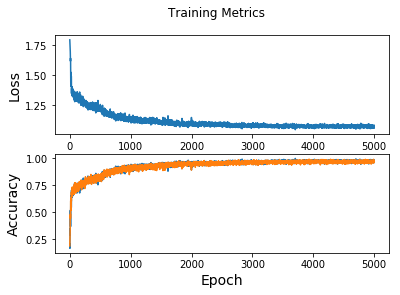

In [10]:
# Initialiser les Placeholders
x = tf.placeholder(tf.float32, shape=(None, 40, 4, 1))
y = tf.placeholder(tf.int64, shape=(None))
dropout_prob = tf.placeholder(tf.float32)
step = tf.placeholder(tf.int64)

#The layers of the neural network
conv_1 = tf.layers.conv2d(inputs= x,filters=4, kernel_size=6, padding="SAME",strides=[1,1], activation=tf.nn.relu)
#pool1 = tf.nn.max_pool(conv_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool1")
conv_2 = tf.layers.conv2d(inputs=conv_1,filters=8, kernel_size=5, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
pool2 = tf.nn.max_pool(conv_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool2")

conv_3 = tf.layers.conv2d(inputs=pool2,filters=16, kernel_size=5, padding="SAME",strides=[1, 1], activation=tf.nn.relu)
conv_4 = tf.layers.conv2d(inputs=conv_3,filters=32, kernel_size=4, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
pool4 = tf.nn.max_pool(conv_4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool4")
shape = pool4.get_shape().as_list()
reshaped = tf.reshape(pool4, shape=[-1, shape[1] * shape[2] * shape[3]])
dense1 = tf.contrib.layers.fully_connected(reshaped, 185 ,activation_fn=tf.nn.relu,scope='dense1')
dropout = tf.nn.dropout(dense1,dropout_prob)
logits = tf.contrib.layers.fully_connected(dropout, 6 ,activation_fn=None,scope='dense2')
softmax = tf.nn.softmax(logits, name = "Out")

with tf.name_scope("Loss"):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=softmax, name=None)
    loss = tf.reduce_mean(cross_entropy)
    
with tf.name_scope("Train"):
    learning_rate = 0.0765 + tf.train.exponential_decay(0.0925,step,5000,1/math.e)
    train_op = tf.train.GradientDescentOptimizer(learning_rate= learning_rate).minimize(loss)
    
with tf.name_scope("accuracy"):
    # Convert logits to label indexes
    prediction = tf.argmax(softmax, 1)
    num_correct_prediction = tf.equal(prediction, y)
    accuracy = tf.reduce_mean(tf.cast(num_correct_prediction, tf.float32))
    
    
## Note: Rerunning this cell uses the same model variables
train_loss_results = []
train_accuracy_results = []
test_accuracy_results = []

# Initilize the Session
sess = tf.Session()

# Initialize the model's variables
sess.run(tf.global_variables_initializer())

data_Train = np.zeros((500,40,4,1), dtype='i')
label_Train = np.zeros((500), dtype='i')
data_Test = np.zeros((500,40,4,1), dtype='i')
label_Test = np.zeros((500), dtype='i')
buff_features = train[0]
buff_label = train[1]
buff2_features = test[0]
buff2_label = test[1]

for i in range(5000):
    ### Votre code
    for j in range(500):
        rand = randint(0,buff_features.shape[0]-1)
        data_Train[j,:,:,:] = buff_features[rand,:,:,:]
        label_Train[j] = buff_label[rand]
        rand = randint(0,buff2_features.shape[0]-1)
        data_Test[j,:,:,:] = buff2_features[rand,:,:,:]
        label_Test[j] = buff2_label[rand]
    
    loss_val, accuracy_val = sess.run([loss,accuracy], feed_dict={x: data_Train, y: label_Train, dropout_prob: 1})
    sess.run(train_op, feed_dict={x: data_Train, y: label_Train, step: i, dropout_prob: 0.75})
     ### Votre Code
    # On récupère le taux de prédiction sur les données test
    test_accuracy_val = sess.run([accuracy], feed_dict={x: data_Test, y: label_Test, dropout_prob: 1})[0]

    print(" Epoch :", i," Loss: ", loss_val," Accuracy: ", accuracy_val," Accuracy Test: ",test_accuracy_val)

    train_loss_results.append(loss_val)
    train_accuracy_results.append(accuracy_val)
    test_accuracy_results.append(test_accuracy_val)
            
# Plot the evolution of loss and train accuracy
fig, axes = plt.subplots(2)
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
axes[1].plot(test_accuracy_results)
plt.show()